# 17 Reto_SC_63 - Mercadotecnia Telefónica con Aprendizaje Supervisado

# Importación de librerías y carga de datos


In [9]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder,  MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#4.	Incluye las librerías que consideres adecuadas y
#carga los datos del archivo en una variable llamada “data”.

data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data17/bank_marketing_RETO_DS_AS.csv')

data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,31,self-employed,married,tertiary,no,2666,no,no,cellular,10,nov,318,2,97,6,success,yes
1,29,unemployed,single,unknown,no,1584,no,no,cellular,6,sep,245,1,-1,0,unknown,yes
2,41,blue-collar,married,secondary,no,2152,yes,no,cellular,17,nov,369,1,-1,0,unknown,no
3,50,blue-collar,married,secondary,no,84,yes,no,cellular,17,jul,18,8,-1,0,unknown,no
4,40,admin.,married,secondary,no,0,no,no,cellular,28,jul,496,2,182,11,success,yes


# Exploración de datos

In [ ]:
#5. Obtener la información de dicha base de datos que incluya el número de registros,
#el total de variables, el tipo de cada variable,
#la cantidad de datos perdidos de cada variable en caso de que existan


#DESCRIPCION DE VARIABLES DEL DATASET

#VARIABLE	  CALIFICACIÓN	ESCALA		DESCRIPCIÓN
#age			  Cuantitativa	Razón		  Se mide en número y tiene cero absoluto.
#job			  Cualitativa		Nominal		Las categorías no tienen un orden especifico
#marital		Cualitativa		Nominal		Las categorías no tienen un orden especifico
#education	Cualitativa		Ordinal		Existe un orden jerárquico
#default		Cualitativa		Nominal		Variable binaria
#balance		Cuantitativa	Razón		  Se mide en número y tiene cero absoluto
#housing		Cualitativa		Nominal		Variable binaria, indica si el cliente tiene un préstamo hipotecario
#loan		    Cualitativa		Nominal		Variable binaria, indica si el cliente tiene un préstamo personal
#contact		Cualitativa		Nominal		Las categorías no tienen un orden especifico
#day			  Cuantitativa	Intervalo	Se mide en número y no tiene cero absoluto
#month		  Cualitativa		Nominal		Variable categorícas
#duration	  Cuantitativa	Razón		  Se mide en número y tiene cero absoluto
#campaign	  Cuantitativa	Razón		  Se mide en número y tiene cero absoluto
#pdays		  Cuantitativa	Razón		  Se mide en número y tiene cero absoluto
#previous	  Cuantitativa	Razón		  Se mide en número y tiene cero absoluto
#poutcome	  Cualitativa		Nominal		Las categorías no tienen un orden especifico
#y			    Cualitativa		Nominal		Variable binaria - Variable dependiente


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        9000 non-null   int64 
 1   job        9000 non-null   object
 2   marital    9000 non-null   object
 3   education  9000 non-null   object
 4   default    9000 non-null   object
 5   balance    9000 non-null   int64 
 6   housing    9000 non-null   object
 7   loan       9000 non-null   object
 8   contact    9000 non-null   object
 9   day        9000 non-null   int64 
 10  month      9000 non-null   object
 11  duration   9000 non-null   int64 
 12  campaign   9000 non-null   int64 
 13  pdays      9000 non-null   int64 
 14  previous   9000 non-null   int64 
 15  poutcome   9000 non-null   object
 16  y          9000 non-null   object
dtypes: int64(7), object(10)
memory usage: 1.2+ MB


In [ ]:
data['age'].value_counts()

,count
age,
31,405
32,401
35,379
33,375
34,358
...,...
87,2
90,1
92,1


In [ ]:
data['job'].value_counts()

,count
job,
management,1999
blue-collar,1688
technician,1485
admin.,1004
services,771
retired,594
self-employed,319
student,312
unemployed,290


In [ ]:
data['marital'].value_counts()

,count
marital,
married,5124
single,2837
divorced,1039


In [ ]:
data['education'].value_counts()

,count
education,
secondary,4486
tertiary,2893
primary,1244
unknown,377


In [ ]:
data['default'].value_counts()

,count
default,
no,8865
yes,135


In [ ]:
data['balance'].value_counts()

,count
balance,
0,616
1,38
2,30
3,23
5,22
...,...
7554,1
-44,1
3073,1


In [ ]:
data['housing'].value_counts()

,count
housing,
no,4564
yes,4436


In [ ]:
data['loan'].value_counts()

,count
loan,
no,7820
yes,1180


In [ ]:
data['contact'].value_counts()

,count
contact,
cellular,6438
unknown,1982
telephone,580


In [ ]:
data['day'].value_counts()

,count
day,
18,462
20,446
21,376
13,372
6,372
14,368
5,367
8,357
30,350


In [ ]:
data['month'].value_counts()

,count
month,
may,2361
jul,1287
aug,1227
jun,1023
nov,723
apr,707
feb,557
oct,293
jan,289


In [ ]:
data['duration'].value_counts()

,count
duration,
150,34
127,32
119,31
104,31
135,30
...,...
1152,1
1160,1
2078,1


In [ ]:
data['campaign'].value_counts()

,count
campaign,
1,3814
2,2505
3,1057
4,610
5,309
6,212
7,133
8,87
9,60


In [ ]:
data['pdays'].value_counts()

,count
pdays,
-1,6781
182,70
92,68
181,62
183,54
...,...
245,1
56,1
476,1


In [ ]:
data['previous'].value_counts()

,count
previous,
0,6781
1,710
2,554
3,333
4,191
5,124
6,82
7,59
8,42


In [ ]:
data['poutcome'].value_counts()

,count
poutcome,
unknown,6783
failure,1006
success,770
other,441


In [6]:
#Eliminar valores "desconocidos"

data2 = data[data['job'] != "unknown"]  #unknown	51
data2 = data2[data2['marital'] != "unknown"]  #unknown	0
data2 = data2[data2['education'] != "unknown"]  #unknown	377
data2 = data2[data2['default'] != "unknown"]  #unknown	0
data2 = data2[data2['housing'] != "unknown"]  #unknown	0
data2 = data2[data2['loan'] != "unknown"]  #unknown	0
data2 = data2[data2['contact'] != "unknown"]  #unknown	1982
data2 = data2[data2['poutcome'] != "unknown"]  #unknown	6783
data2.dropna(inplace=True)


data2.shape

(2092, 17)

In [ ]:
data2.describe(include='all')

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,2092.000000,2092,2092,2092,2092,2092.000000,2092,2092,2092,2092.000000,2092,2092.000000,2092.000000,2092.000000,2092.000000,2092,2092
unique,NaN,11,3,3,2,NaN,2,2,2,NaN,12,NaN,NaN,NaN,NaN,3,2
top,NaN,management,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,NaN,failure,yes
freq,NaN,525,1175,1051,2079,NaN,1048,1895,1944,NaN,532,NaN,NaN,NaN,NaN,959,1253
mean,41.271511,NaN,NaN,NaN,NaN,1791.563576,NaN,NaN,NaN,14.895315,NaN,330.547801,1.923996,207.783461,3.226577,NaN,NaN
std,12.424613,NaN,NaN,NaN,NaN,3561.288129,NaN,NaN,NaN,8.208488,NaN,278.183450,1.383602,117.140510,3.530194,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,-1884.000000,NaN,NaN,NaN,1.000000,NaN,5.000000,1.000000,1.000000,1.000000,NaN,NaN
25%,32.000000,NaN,NaN,NaN,NaN,223.000000,NaN,NaN,NaN,8.000000,NaN,155.750000,1.000000,101.000000,1.000000,NaN,NaN
50%,38.000000,NaN,NaN,NaN,NaN,732.500000,NaN,NaN,NaN,14.000000,NaN,251.000000,1.000000,183.000000,2.000000,NaN,NaN
75%,49.000000,NaN,NaN,NaN,NaN,2021.500000,NaN,NaN,NaN,21.000000,NaN,414.000000,2.000000,294.000000,4.000000,NaN,NaN


In [ ]:
data2.shape[0]

2092

In [ ]:
data2.value_counts()

age  job            marital  education  default  balance  housing  loan  contact    day  month  duration  campaign  pdays  previous  poutcome  y  
86   retired        married  primary    no       1255     no       no    telephone  14   jul    247       1         180    3         success   yes    1
18   student        single   primary    no       608      no       no    cellular   13   nov    210       1         93     1         success   yes    1
19   student        single   primary    no       608      no       no    cellular   12   may    236       1         180    2         success   yes    1
                             secondary  no       55       no       no    telephone  6    oct    89        2         193    1         other     no     1
                                                 329      no       no    cellular   30   apr    169       1         190    2         success   yes    1
                                                                                                                                                     ..
22   services       single   secondary  no       129      no       no    cellular   15   apr    218       2         181    1         success   yes    1
     self-employed  single   secondary  no       2138     no       yes   cellular   10   aug    164       1         109    2         other     yes    1
     blue-collar    married  secondary  no       223      yes      no    cellular   6    may    268       1         344    1         failure   no     1
21   student        single   secondary  no       2488     no       no    telephone  12   jan    661       2         92     1         success   yes    1
                                                                         cellular   30   jun    258       6         169    3         success   yes    1
Name: count, Length: 2092, dtype: int64

In [ ]:
a= len(data2.loc[data2['y']=='yes'])
a

1253

In [25]:
# verifiando el balanceo de las clases:

print('Porcentaje que aceptaron plan de inversión: ', 100 * len(data2.loc[data2['y']=='yes']) / data2.shape[0] )

print('Porcentaje que no aceptaron plan de inversión: ', 100 * len(data2.loc[data2['y']=='no']) / data2.shape[0])

Porcentaje que aceptaron plan de inversión:  59.894837476099426
Porcentaje que no aceptaron plan de inversión:  40.105162523900574


# Transformación de datos

In [7]:
#6.	Transforma las variables categóricas de manera que puedan ser tratadas numéricamente.
#Justifica si utilizas LabelEncoder o OneHotEcoder.
df_procesado = data2.copy(deep=True)


for col in df_procesado.columns:
    if df_procesado[col].dtype == 'object':
        y_df = df_procesado[[col]]
        y_corrected = y_df.values.ravel()
        df_procesado[col] = LabelEncoder().fit_transform(y_corrected)

df_procesado.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,31,6,1,2,0,2666,0,0,0,10,9,318,2,97,6,2,1
4,40,0,1,1,0,0,0,0,0,28,5,496,2,182,11,2,1
7,26,9,2,1,0,1231,1,0,0,3,6,385,2,96,5,2,1
11,31,6,2,2,0,17924,1,0,0,14,8,745,1,174,3,0,1
19,52,7,1,1,0,659,0,0,0,28,4,390,4,93,1,2,1


In [ ]:
df_procesado.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2092 entries, 0 to 8999
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        2092 non-null   int64
 1   job        2092 non-null   int64
 2   marital    2092 non-null   int64
 3   education  2092 non-null   int64
 4   default    2092 non-null   int64
 5   balance    2092 non-null   int64
 6   housing    2092 non-null   int64
 7   loan       2092 non-null   int64
 8   contact    2092 non-null   int64
 9   day        2092 non-null   int64
 10  month      2092 non-null   int64
 11  duration   2092 non-null   int64
 12  campaign   2092 non-null   int64
 13  pdays      2092 non-null   int64
 14  previous   2092 non-null   int64
 15  poutcome   2092 non-null   int64
 16  y          2092 non-null   int64
dtypes: int64(17)
memory usage: 294.2 KB


In [8]:
df_procesado.to_csv('df_procesado.csv')

In [24]:
#Normalizar los datos
#variables numericas
cols_numericas = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

#variables categoricas
cols_categoricas = ['job', 'marital', 'education', 'default', 'housing','loan', 'contact', 'month', 'poutcome', 'y']

df_num = df_procesado[cols_numericas]
df_cat = df_procesado[cols_categoricas]

scaler = StandardScaler()

num_scaled_array = scaler.fit_transform(df_num)
df_num_scaled = pd.DataFrame(num_scaled_array, columns=cols_numericas, index=df_num.index)

df_normalizado = pd.concat([df_num_scaled, df_cat], axis=1)

df_normalizado.head()

,age,balance,day,duration,campaign,pdays,previous,job,marital,education,default,housing,loan,contact,month,poutcome,y
0,-0.826904,0.245598,-0.596515,-0.045117,0.054945,-0.945958,0.785817,6,1,2,0,0,0,0,9,2,1
4,-0.102363,-0.503186,1.596861,0.594902,0.054945,-0.220160,2.202508,0,1,1,0,0,0,0,5,2,1
7,-1.229428,-0.157442,-1.449495,0.195789,0.054945,-0.954496,0.502479,9,2,1,0,1,0,0,6,2,1
11,-0.826904,4.531027,-0.109098,1.490208,-0.667979,-0.288470,-0.064198,6,2,2,0,1,0,0,8,0,1
19,0.863693,-0.318097,1.596861,0.213767,1.500793,-0.980113,-0.630875,7,1,1,0,0,0,0,4,2,1


**6.a Justifica el uso de LabelEncoder o OneHotEcoder.**

*Se decide usar **LabelEncoder**, para que el dataframe resultante sea manejable respecto a las columnas, ya que si optamos por el **OneHotEcoder**, tendriamos un columna adicional por cada diferencia del elemente en cada columna.*

In [12]:
# 7.	Transforma las variables numéricas en los casos que se tenga algún tipo de sesgo.
# 8.	Considera la variable “y” como la variable de salida y el resto de las variables como las variables de entrada.
X = df_normalizado[ ['age','job','marital','education','default','balance','housing','loan','contact','duration','campaign','pdays','previous','poutcome']].copy()
#X = df_procesado[ ['age','job','marital','education','default','balance','housing','loan','contact','duration','campaign','pdays','previous','poutcome']].copy()
X.head()

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome
0,-0.826904,6,1,2,0,0.245598,0,0,0,-0.045117,0.054945,-0.945958,0.785817,2
4,-0.102363,0,1,1,0,-0.503186,0,0,0,0.594902,0.054945,-0.220160,2.202508,2
7,-1.229428,9,2,1,0,-0.157442,1,0,0,0.195789,0.054945,-0.954496,0.502479,2
11,-0.826904,6,2,2,0,4.531027,1,0,0,1.490208,-0.667979,-0.288470,-0.064198,0
19,0.863693,7,1,1,0,-0.318097,0,0,0,0.213767,1.500793,-0.980113,-0.630875,2


In [13]:
#Y = df_procesado[['y']].copy()
Y = df_normalizado[['y']].copy()
Y.head()

,y
0,1
4,1
7,1
11,1
19,1


In [14]:
Y.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2092 entries, 0 to 8999
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   y       2092 non-null   int64
dtypes: int64(1)
memory usage: 32.7 KB


In [15]:
# 9.	Particiona los datos en los conjuntos de entrenamiento,
#validación y prueba en 60%, 20% y 20%, respectivamente.


X_train, X_val_test, Y_train, Y_val_test = train_test_split(X, Y, train_size=.60,random_state=11)
X_val, X_test, Y_val, Y_test = train_test_split(X_val_test, Y_val_test, train_size=.50)


print("Dimensión X_train:\t\t", X_train.shape)
print("Dimension X_val:\t\t", X_val.shape)
print("Dimension X_test:\t\t", X_test.shape)

print("\nDimensión Y_train:\t\t", Y_train.shape)
print("Dimensión Y_val:\t\t", Y_val.shape)
print("Dimensión Y_test:\t\t", Y_test.shape)

Dimensión X_train:		 (1255, 14)
Dimension X_val:		 (418, 14)
Dimension X_test:		 (419, 14)

Dimensión Y_train:		 (1255, 1)
Dimensión Y_val:		 (418, 1)
Dimensión Y_test:		 (419, 1)


In [16]:
np.ravel(Y_train).shape

(1255,)

# Modelo Regresión Logística

In [26]:
# 10. APLICA el modelo Regresión Logística en el conjunto de entrenamiento.
# VALIDA el modelo con las predicciones del conjunto de validación y su matriz de confusión.
# AJUSTA los parámetros del modelo hasta obtener tu mejor resultado.
from sklearn.linear_model import LogisticRegression

#Regresión logística
#clf = LogisticRegression( C=1.0, solver='newton-cg' )

clf = LogisticRegression( C=0.2,solver='lbfgs',max_iter=1000)

# Explicitly cast to int type
modelo_RL = clf.fit( X_train,  np.ravel(Y_train) )

print ('Regresión Logística:\nExactitud (accuracy) con el conjunto de Validación = ' ,modelo_RL.score(X_val, Y_val))

Regresión Logística:
Exactitud (accuracy) con el conjunto de Validación =  0.80622009569378


COMENTARIOS:
El modelo de regresión logistica clasifica correcatmente de 8 de cada 10 clientes. supera a la linea base que es de 60%.

In [27]:
parameters = {'C':[0.1, 0.15, 0.18, 0.2, 0.22, 0.24, 0.28, 0.3],
              'penalty':('l2','elasticnet', 'none'),
              'solver':('newton-cg','saga','lbfgs','sag')}

In [28]:
from sklearn.model_selection import GridSearchCV

RL_grid = LogisticRegression(max_iter=10000)
modelo_RL_grid = GridSearchCV(RL_grid, parameters)

modelo_RL_grid.fit(X_train,  np.ravel(Y_train))

print(modelo_RL_grid)

print("Los mejores valores encontrados son %s con un score de %0.2f"
      % (modelo_RL_grid.best_params_, modelo_RL_grid.best_score_))

print(modelo_RL_grid.score(X_val, Y_val))

GridSearchCV(estimator=LogisticRegression(max_iter=10000),
             param_grid={'C': [0.1, 0.15, 0.18, 0.2, 0.22, 0.24, 0.28, 0.3],
                         'penalty': ('l2', 'elasticnet', 'none'),
                         'solver': ('newton-cg', 'saga', 'lbfgs', 'sag')})
Los mejores valores encontrados son {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'} con un score de 0.80
0.8038277511961722


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
320 fits failed out of a total of 480.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py", line 1193, in fit
    solver = _check_solv

In [20]:
#Validación
modelo_RL_tmp = LogisticRegression( C=0.28,
                                   penalty='l2',
                                   solver='newton-cg'
                                   )

modelo_RL_tmp.fit( X_train, np.ravel(Y_train) )

print(modelo_RL_tmp.score(X_val, Y_val))

0.80622009569378


In [21]:
#Test
modelo_RL_tmp = LogisticRegression( C=0.1,
                                   penalty='l2',
                                   solver='lbfgs'
                                   )

modelo_RL_tmp.fit( X_train, np.ravel(Y_train) )

print(modelo_RL_tmp.score(X_test, Y_test))

0.8233890214797136


COMENTARIOS:
El modelo logró una exactitud alta y consistente en la validación y prueba, lo que se puede interpretar como buena capacidad de generalización.



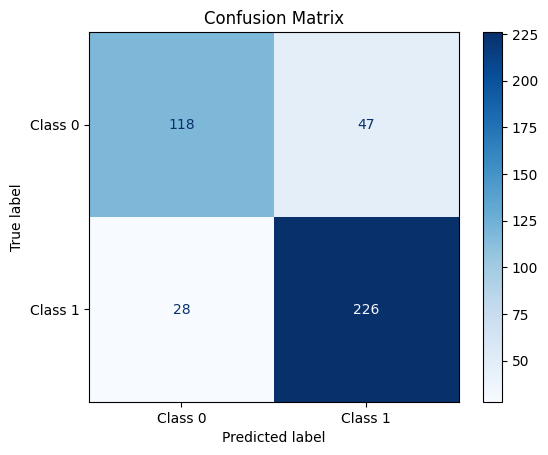

In [22]:


import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# Plot the confusion matrix
disp = ConfusionMatrixDisplay.from_estimator(clf, X_test, Y_test,
                                            cmap=plt.cm.Blues,
                                            display_labels=['Class 0', 'Class 1'])
disp.ax_.set_title("Confusion Matrix")
plt.show()

COMENTARIOS:


---


Precisión:
VP  / (VP + FP)
226 / (226 + 47)  = 82.8

Acierta las 83% de las veces, el margen de error FP es de 47.

Recall
VP / (VP + FN)
226 / (226 + 28)  = 89

Compradores reales que se detectaron, casi un 90%, se perdieron pocas oportunidades de venta. (28 fueron clasificados como "NO").



# Modelo Red Neuronal

In [31]:
#Definimos el número de neuronas a utilizar en el modelo
neuronas = [i for i in range(1, 50, 5)]

print(neuronas)

[1, 6, 11, 16, 21, 26, 31, 36, 41, 46]


In [49]:
# 11. Aplica el modelo Red Neuronal en el conjunto de entrenamiento.
#Valida el modelo con las predicciones del conjunto de validación y su matriz de confusión.
#Ajusta los parámetros del modelo hasta obtener tu mejor modelo,
#entre ellos el número de neuronas y capas ocultas.
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt

train_scores, val_scores, test_scores = list(), list(), list()
train_errors, val_errors, test_errors = list(), list(), list()

for i in neuronas:

  model = MLPClassifier(hidden_layer_sizes=(i,i),
                        max_iter=1000,
                        alpha=1.5,
                        random_state=42)

  model.fit(X_train,np.ravel(Y_train))

  # TRAIN set
  train_yhat = model.predict(X_train)

  train_loss = np.mean(abs(np.ravel(Y_train) - train_yhat))
  train_errors.append(train_loss)

  train_acc = 1 - train_loss
  train_scores.append(train_acc)


  # VAL set
  val_yhat = model.predict(X_val)

  val_loss = np.mean(abs(np.ravel(Y_val) - val_yhat))
  val_errors.append(val_loss)

  val_acc = 1 - val_loss
  val_scores.append(val_acc)


  # progreso de las épocas del entrenamiento ...
  print('>%d, train: %.3f, Val: %.3f, losstrain: %.3f, lossVal: %.3f' % (i, train_acc, val_acc, train_loss, val_loss))

>1, train: 0.607, Val: 0.567, losstrain: 0.393, lossVal: 0.433
>6, train: 0.819, Val: 0.821, losstrain: 0.181, lossVal: 0.179
>11, train: 0.821, Val: 0.813, losstrain: 0.179, lossVal: 0.187
>16, train: 0.825, Val: 0.823, losstrain: 0.175, lossVal: 0.177
>21, train: 0.837, Val: 0.813, losstrain: 0.163, lossVal: 0.187
>26, train: 0.832, Val: 0.818, losstrain: 0.168, lossVal: 0.182
>31, train: 0.847, Val: 0.804, losstrain: 0.153, lossVal: 0.196
>36, train: 0.839, Val: 0.813, losstrain: 0.161, lossVal: 0.187
>41, train: 0.845, Val: 0.811, losstrain: 0.155, lossVal: 0.189
>46, train: 0.845, Val: 0.804, losstrain: 0.155, lossVal: 0.196


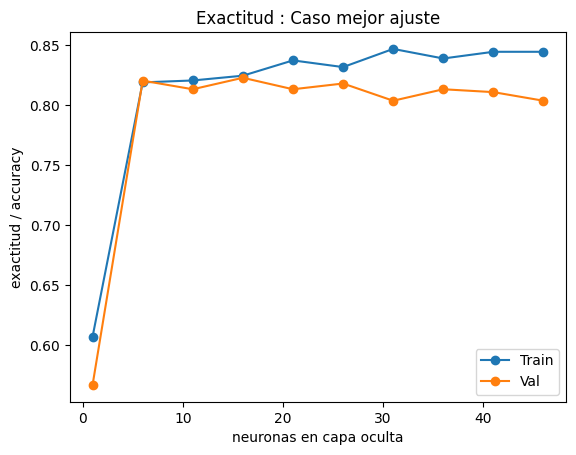

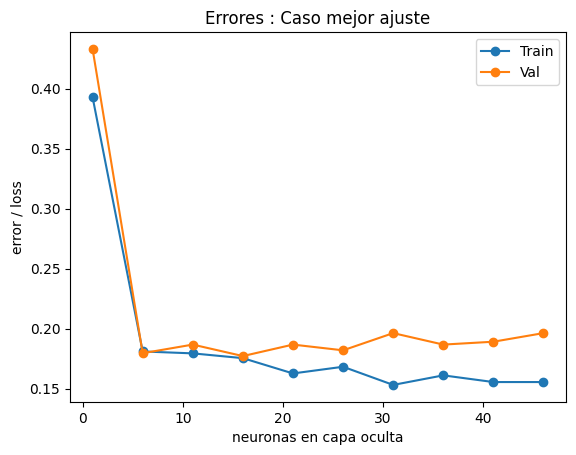

In [51]:
# 12.	Selecciona el mejor modelo encontrado en los incisos anteriores y utiliza el conjunto de prueba para obtener el desempeño final del modelo y su matriz de confusión.
plt.plot(neuronas, train_scores, '-o', label='Train')
plt.plot(neuronas, val_scores, '-o', label='Val')
plt.legend()
plt.title('Exactitud : Caso mejor ajuste')
plt.xlabel('neuronas en capa oculta')
plt.ylabel('exactitud / accuracy')
plt.show()


plt.plot(neuronas, train_errors, '-o', label='Train')
plt.plot(neuronas, val_errors, '-o', label='Val')
plt.legend()
plt.title('Errores : Caso mejor ajuste')
plt.xlabel('neuronas en capa oculta')
plt.ylabel('error / loss')
plt.show()

COMENTARIOS:

De acuerdo a lo visto en las gráficas se puede interpretar lo siguiente:

1 =  el modelo esta subentrenado, no logra aprender patrones.

Mayor 21 = el modelo esta sobreentrenado, el modelo memoriza los datos de entrenamiento, pero la validación no mejora.

De 6 a 16 = se logra el mejor balance entre apredizaje y validación.
en este rango se visualiza las curvas de exactitud más altas y las de error más bajas y cercanas.


In [52]:
#model.score(X_test, Y_test)
#eliminar

0.8353221957040573

In [56]:
from sklearn.metrics import accuracy_score

# Definir el modelo con el mejor número de neuronas
# En este ejemplo: 16 neuronas en dos capas ocultas
best_model = MLPClassifier(hidden_layer_sizes=(16,16),
                           max_iter=1000,
                           alpha=1.5,
                           random_state=42)

# Entrenar el modelo con el conjunto de entrenamiento
best_model.fit(X_train, np.ravel(Y_train))

# Evaluar en el conjunto de prueba
y_pred = best_model.predict(X_test)

# Exactitud
test_accuracy = accuracy_score(Y_test, y_pred)
print("Exactitud en prueba:", test_accuracy)


Exactitud en prueba: 0.8329355608591885


In [57]:
from sklearn.metrics import confusion_matrix

confusion_matrix(Y_test, y_pred)

array([[117,  48],
       [ 22, 232]])

In [ ]:
train_scores

[np.float64(0.6071713147410358),
 np.float64(0.8079681274900399),
 np.float64(0.8119521912350598),
 np.float64(0.8127490039840637),
 np.float64(0.8127490039840637),
 np.float64(0.8167330677290836),
 np.float64(0.8191235059760956),
 np.float64(0.8183266932270916),
 np.float64(0.8207171314741035),
 np.float64(0.8254980079681276)]

In [ ]:
val_scores

[np.float64(0.6052631578947368),
 np.float64(0.8301435406698565),
 np.float64(0.8325358851674641),
 np.float64(0.8349282296650717),
 np.float64(0.8253588516746412),
 np.float64(0.8373205741626795),
 np.float64(0.8444976076555024),
 np.float64(0.8349282296650717),
 np.float64(0.8444976076555024),
 np.float64(0.8253588516746412)]

In [ ]:
train_errors

[np.float64(0.39282868525896414),
 np.float64(0.19203187250996015),
 np.float64(0.18804780876494023),
 np.float64(0.18725099601593626),
 np.float64(0.18725099601593626),
 np.float64(0.18326693227091634),
 np.float64(0.18087649402390438),
 np.float64(0.18167330677290836),
 np.float64(0.17928286852589642),
 np.float64(0.1745019920318725)]

In [ ]:

val_errors

[np.float64(0.39473684210526316),
 np.float64(0.16985645933014354),
 np.float64(0.1674641148325359),
 np.float64(0.16507177033492823),
 np.float64(0.17464114832535885),
 np.float64(0.16267942583732056),
 np.float64(0.15550239234449761),
 np.float64(0.16507177033492823),
 np.float64(0.15550239234449761),
 np.float64(0.17464114832535885)]

# Conclusiones

In [ ]:
# 13.	Incluye tus conclusiones del problema, en particular,
# ¿qué puedes decir acerca del uso de técnicas de inteligencia artificial en problemas de mercadotecnia?


Sí el modelo aceptara todo tendría una exactitud de 60%, por lo que debemos encontrar un modelo que supere ese porcentaje.


Modelo Regresión Logística:

El modelo es confiable y sólido con un desempeño arriba de 80% y muy buena capacidad para identificar clientes que acepten el plan.

Debido a que el score de TEST es mayor al de VALIDACION nos sugiere que el modelo esta captando patrones reales y no esta sobreajustado.


Modelo de Red Neuronal:




El modelo de Red Neuronal tiene una mejor predicción.
Con este modelo el banco tiene una herramienta que puede detectar un 87% de sus clientes potenciales con certeza del 79%, lo que hace que el programa de telemarketing sea altamente viable.


